# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [44]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
pd.set_option('max_columns', None)

In [2]:
def string_time(column):
    return column.strftime('%d-%m')

In [3]:
# Lendo a tabela principal.
import re
def read_table(binsize = 400):
    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    return df

# Pegando o csv solicitado para as nossas análises.
def read_station():
    base = read_table()
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
    # Removendo o dia 29 de fevereiro.
    pattern1 = '\d{4}-02-29'
    for i, date in zip(df.index, df.Date):
        if re.search(pattern1, date):
            df.drop(i, axis = 0, inplace = True)
    # Convertendo a coluna 'Date' par o tipo datetime.        
    df['Date'] = pd.to_datetime(df['Date'])
    # Ordenando o DF conforme os valores de 'Date'
    df = df.sort_values(by = 'Date')
    # Convertendo os valores para string novamente sem o ano especificado.
    return df

# Criando um DF com as temperaturas de 2005 a 2014 e um outro com as de 2015.
quinze = pd.date_range(start = '2015-01-01', end = '2015-12-31')
all_temperatures = read_station()[~read_station()['Date'].isin(quinze)].set_index('Date')[['Element', 'Data_Value']]
only_2015 = read_station()[read_station()['Date'].isin(quinze)].set_index('Date')[['Element', 'Data_Value']]

In [22]:
# Convertendo todos os anos de 'all_temperatures'
new_dates_all = []
for date in all_temperatures.index: 
    date = date.replace(year = 2001)
    new_dates_all.append(date)#.index.apply(lambda dt: dt.replace(year = 2001))
    
all_temperatures.index = new_dates_all

In [24]:
all_temperatures.head()

,Element,Data_Value
2001-01-01,TMAX,56
2001-01-01,TMIN,-39
2001-01-01,TMAX,150
2001-01-01,TMAX,150
2001-01-01,TMIN,-39


In [294]:
only_2015.head()

,Element,Data_Value
Date,,
2015-01-01,TMIN,-88
2015-01-01,TMAX,-6
2015-01-01,TMAX,-44
2015-01-01,TMIN,-106
2015-01-01,TMIN,-94


In [26]:
new_dates_only = []
for date in only_2015.index:
    date = date.replace(year = 2001)
    new_dates_only.append(date)

only_2015.index = new_dates_only

In [27]:
only_2015.head()

,Element,Data_Value
2001-01-01,TMIN,-88
2001-01-01,TMAX,-6
2001-01-01,TMAX,-44
2001-01-01,TMIN,-106
2001-01-01,TMIN,-94


In [107]:
# Extraindo os valores de temperatura máxima e mínima do DataFrame 'all_temperatures'.
# Como, para um mesmo dia, são registrados vários máximos e mínimos, decidi selecionar as temperaturas 
# máximas das máximas e mínimas das mínimas.
max_all = all_temperatures[all_temperatures['Element'] == 'TMAX']
max_all = max_all.groupby([max_all.index])['Data_Value'].max()
min_all = all_temperatures[all_temperatures['Element'] == 'TMIN']
min_all = min_all.groupby([min_all.index])['Data_Value'].min()

# Agora, fazendo o mesmo procedimento com o DF 'only_2015'
max_2015 = only_2015[only_2015['Element'] == 'TMAX']
max_2015 = max_2015.groupby([max_2015.index])['Data_Value'].max()
min_2015 = only_2015[only_2015['Element'] == 'TMIN']
min_2015 = min_2015.groupby([min_2015.index])['Data_Value'].min()

In [108]:
# Droppando as datas de max_2015 que não tenham sido maiores do que os recordes.
for i,value in zip(max_2015.index, max_2015):
    if value < max_all.loc[i]:
        max_2015.drop(i, axis = 0, inplace = True)
        
# Fazendo o mesmo para o min_2015.
for i, value in zip(min_2015.index, min_2015):
    if value > min_all.loc[i]:
        min_2015.drop(i, axis = 0, inplace = True)

In [110]:
len(max_2015)
len(min_2015)

44

In [117]:
max_all

2001-01-01    156
2001-01-02    139
2001-01-03    133
2001-01-04    106
2001-01-05    128
2001-01-06    189
2001-01-07    217
2001-01-08    194
2001-01-09    178
2001-01-10    100
2001-01-11    156
2001-01-12    161
2001-01-13    167
2001-01-14    150
2001-01-15     67
2001-01-16     94
2001-01-17    133
2001-01-18    122
2001-01-19    106
2001-01-20    133
2001-01-21    133
2001-01-22    117
2001-01-23    128
2001-01-24    117
2001-01-25    100
2001-01-26     89
2001-01-27     78
2001-01-28    122
2001-01-29    178
2001-01-30    183
             ... 
2001-12-02    156
2001-12-03    183
2001-12-04    183
2001-12-05    172
2001-12-06    128
2001-12-07     83
2001-12-08     72
2001-12-09     83
2001-12-10    111
2001-12-11    128
2001-12-12    133
2001-12-13    111
2001-12-14    139
2001-12-15    150
2001-12-16    139
2001-12-17    144
2001-12-18    156
2001-12-19    122
2001-12-20    133
2001-12-21    156
2001-12-22    133
2001-12-23    133
2001-12-24    139
2001-12-25    100
2001-12-26

In [116]:
max_2015

2001-02-09     83
2001-04-17    278
2001-05-07    306
2001-05-08    333
2001-05-10    294
2001-05-11    306
2001-05-17    300
2001-05-18    317
2001-07-27    339
2001-07-29    361
2001-08-14    317
2001-08-19    328
2001-09-07    350
2001-09-08    339
2001-09-16    311
2001-09-17    317
2001-09-18    300
2001-09-27    278
2001-09-28    294
2001-09-29    283
2001-10-20    272
2001-11-02    228
2001-11-03    261
2001-11-04    261
2001-11-05    256
2001-11-06    239
2001-11-16    194
2001-11-18    200
2001-11-19    178
2001-12-07    100
2001-12-08    100
2001-12-09    122
2001-12-10    150
2001-12-11    156
2001-12-12    200
2001-12-13    194
2001-12-14    183
2001-12-15    161
2001-12-16    150
2001-12-22    133
2001-12-23    183
2001-12-24    172
2001-12-25    111
2001-12-26    117
Name: Data_Value, dtype: int64

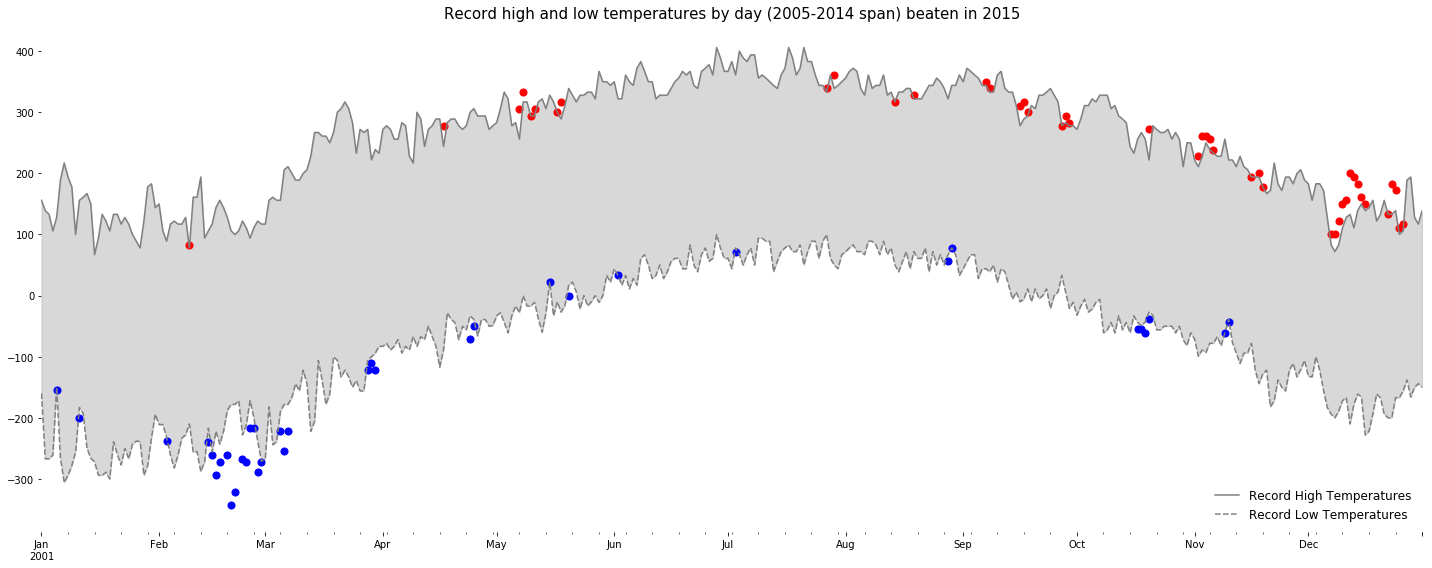

In [174]:
# Plotando os gráficos.
import matplotlib.dates as mdates
max_all.plot(figsize = (20, 8), color = 'grey', label = 'Record High Temperatures')
min_all.plot(color = 'grey', linestyle = '--', label = 'Record Low Temperatures')
plt.fill_between(max_all.index, min_all, max_all, color = 'grey', alpha = 0.3)

plt.scatter(x = max_2015.index, y = max_2015.values, color = 'r', s = 50)
plt.scatter(x = min_2015.index, y = min_2015.values, color = 'b', s = 50)
plt.title('Record high and low temperatures by day (2005-2014 span) beaten in 2015', fontsize = 15) 
ax = plt.gca()
for frame in ax.spines.values():
    frame.set_visible(False)
    
xfmt = mdates.DateFormatter('%b')
#ax.xaxis.set_major_formatter(xfmt)
plt.legend(frameon = False, fontsize = 'large', loc = 'lower right')
plt.tight_layout()
plt.savefig('Solution.png')

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], 
      dtype='<U3')

In [34]:
# Acredito que essta função serve apenas para nos informar as localizações das estações metereológicas.
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')